---

# Practical example: Predicting Pulsar Star

More details in: [Predicting Pulsar Star](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate)

## Proposed problem

Classify stars between Pulsar (1) and non-Pulsar (0).

Note: The data were collected and previously treated.
 
## 1. Data Collection

### Dataset - [pulsar_stars.csv](data/pulsar_stars.csv)

**rows**: 16,259 spurious examples (RFI/noise), and 1,639 real pulsar examples. Total of 17,898 rows.  

**columns**: 9 features, namely:  
  1. Mean of the integrated profile.
  2. Standard deviation of the integrated profile.
  3. Excess kurtosis of the integrated profile.
  4. Skewness of the integrated profile.
  5. Mean of the DM-SNR curve.
  6. Standard deviation of the DM-SNR curve.
  7. Excess kurtosis of the DM-SNR curve.
  8. Skewness of the DM-SNR curve.
  9. Class (1=Pulsar, 0=non-Pulsar)

So, the features are columns 1 to 8, and the label is the column 9.

In [1]:
# Data manipulation
import pandas as pd 
# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
dataset = 'data/pulsar_stars.csv'

In [3]:
df = pd.read_csv(dataset)

In [4]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


## 2. Exploratory data analysis

## 2.1 Data visualization

In [5]:
df.shape

(17898, 9)

In [6]:
df.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


### View data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


### Data overview

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
Standard deviation of the integrated profile,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
Excess kurtosis of the integrated profile,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Skewness of the integrated profile,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
Mean of the DM-SNR curve,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392141
Standard deviation of the DM-SNR curve,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
Excess kurtosis of the DM-SNR curve,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
Skewness of the DM-SNR curve,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309330,1191.000837
target_class,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


### NA values?

In [9]:
df.isna().any()

 Mean of the integrated profile                  False
 Standard deviation of the integrated profile    False
 Excess kurtosis of the integrated profile       False
 Skewness of the integrated profile              False
 Mean of the DM-SNR curve                        False
 Standard deviation of the DM-SNR curve          False
 Excess kurtosis of the DM-SNR curve             False
 Skewness of the DM-SNR curve                    False
target_class                                     False
dtype: bool

### Duplicate rows?

In [10]:
print("Duplicate rows: ", df.duplicated().sum())

Duplicate rows:  0


### Target (label) class

In [11]:
df.target_class.value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

<AxesSubplot: ylabel='target_class'>

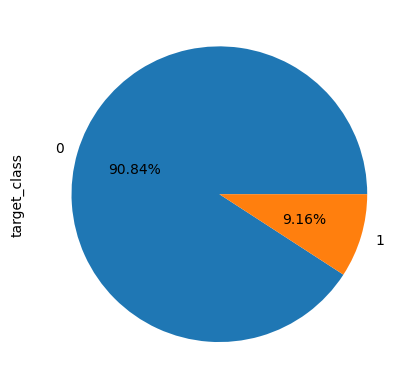

In [12]:
df.target_class.value_counts().plot.pie(autopct='%.2f%%')

**Q1 checkpoint** 

### Correlation matrix

In [13]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_373342/2652942860.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation.style.background_gradient(cmap='coolwarm').set_precision(2)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.00,0.55,-0.87,-0.74,-0.30,-0.31,0.23,0.14,-0.67
Standard deviation of the integrated profile,0.55,1.00,-0.52,-0.54,0.01,-0.05,0.03,0.03,-0.36
Excess kurtosis of the integrated profile,-0.87,-0.52,1.00,0.95,0.41,0.43,-0.34,-0.21,0.79
Skewness of the integrated profile,-0.74,-0.54,0.95,1.00,0.41,0.42,-0.33,-0.20,0.71
Mean of the DM-SNR curve,-0.30,0.01,0.41,0.41,1.00,0.80,-0.62,-0.35,0.40
Standard deviation of the DM-SNR curve,-0.31,-0.05,0.43,0.42,0.80,1.00,-0.81,-0.58,0.49
Excess kurtosis of the DM-SNR curve,0.23,0.03,-0.34,-0.33,-0.62,-0.81,1.00,0.92,-0.39
Skewness of the DM-SNR curve,0.14,0.03,-0.21,-0.20,-0.35,-0.58,0.92,1.00,-0.26
target_class,-0.67,-0.36,0.79,0.71,0.40,0.49,-0.39,-0.26,1.00


### Data visualization

In [14]:
%%javascript
// Avoid scroll bar on very large images
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

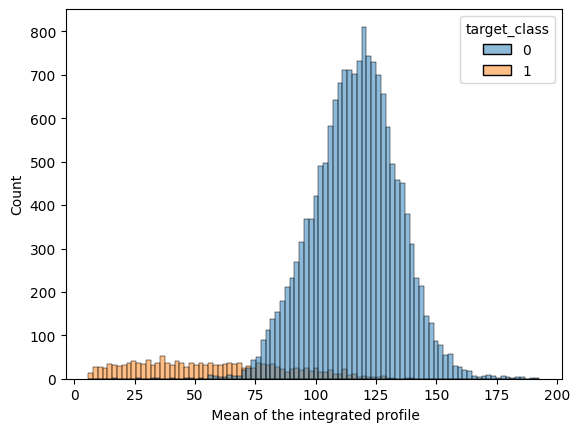

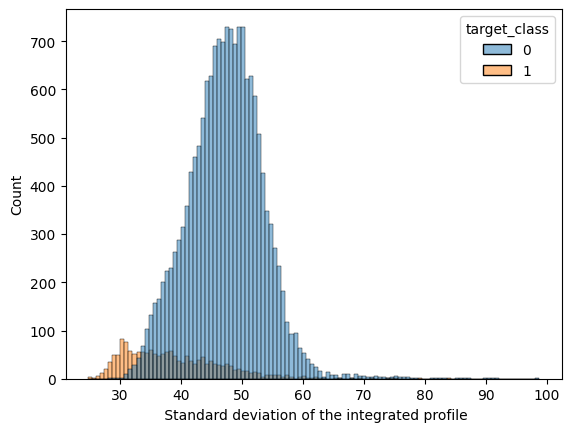

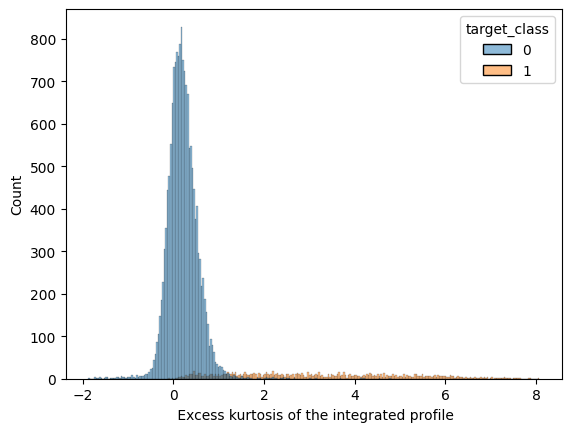

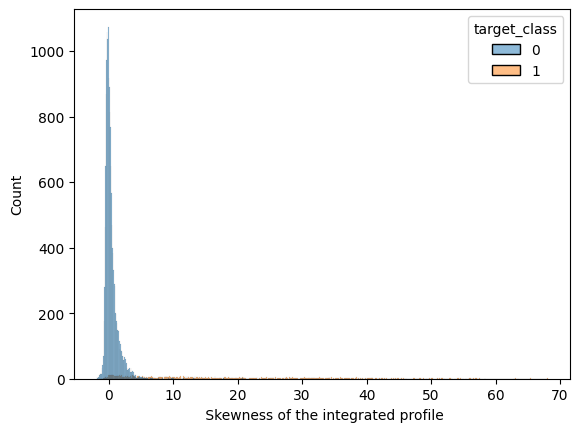

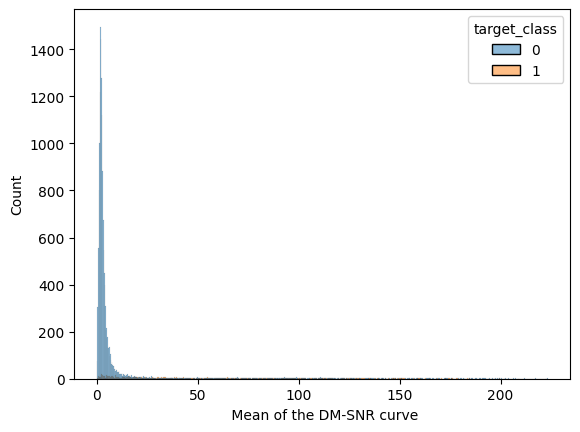

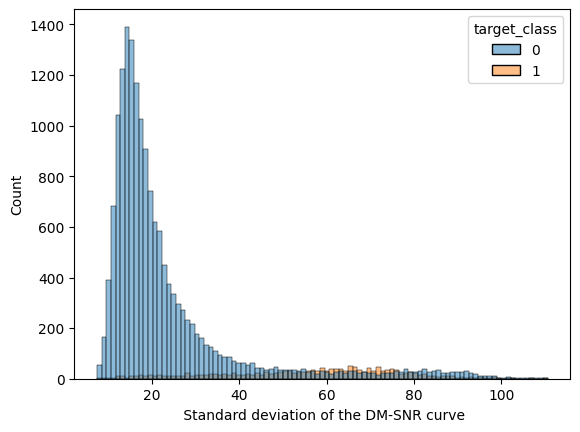

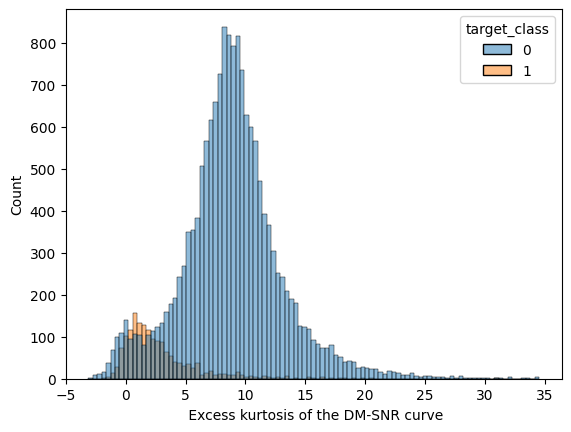

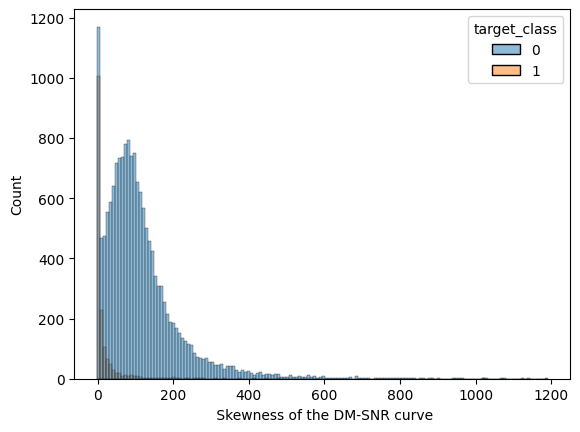

In [15]:
# Plots the histogram of all columns (excluding target_class).
for column in df.columns[:-1]:
    plt.figure()
    sns.histplot(x=df[column], hue=df.target_class)

**Q2 checkpoint** 

## 3 Preprocessing

### 3.1 Missing Data, Encoding, Standardizing, Feature Engineering

Look in: [freecodecamp: Preprocessing](https://www.youtube.com/watch?v=0B5eIE_1vpU&t=2076s) (not necessary in this dataset)

### 3.2 Split data in train/test

In [16]:
X = df.drop(['target_class'], axis=1)
y = df.target_class

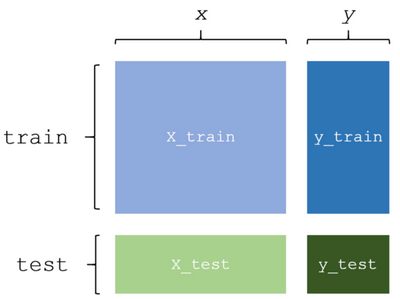

In [17]:
from IPython.display import Image
Image(filename='img/trainTest.png')

By [Andre Ye](https://www.linkedin.com/in/andre-ye-501746150/), in KDnuggets:[The Ultimate Scikit-Learn Machine Learning Cheatsheet](https://www.kdnuggets.com/2021/01/ultimate-scikit-learn-machine-learning-cheatsheet.html).

In [18]:
# Prepare data to train models
from sklearn.model_selection import train_test_split

# 50/50 (common: 70/30 or 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.5, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8949, 8), (8949, 8), (8949,), (8949,))

## 4. Models

## How to use Scikit-Learn?

```python
import pandas as pd
from sklearn.BRANCH import MODEL_NAME
from sklearn.metrics import METRIC_NAME
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('data.csv')  

# Split data into train/test (70/30)
X, y = df.drop(['target'], axis=1), df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42)

# Build model
MODEL = MODEL_NAME()  

# Train model
MODEL.fit(X_train, y_train)

# Results
y_pred_MODEL = MODEL.predict(X_test)  

# Evaluation
METRIC = METRIC_NAME((y_test, y_pred_MODEL)) 
```

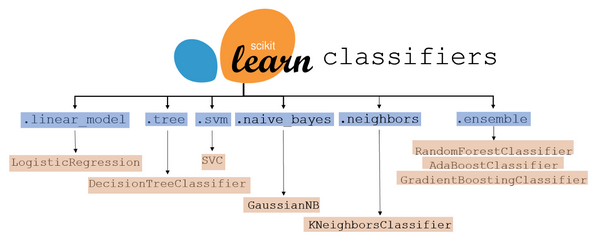

In [19]:
Image(filename='img/classifiers.png')

By [Andre Ye](https://www.linkedin.com/in/andre-ye-501746150/), in KDnuggets:[The Ultimate Scikit-Learn Machine Learning Cheatsheet](https://www.kdnuggets.com/2021/01/ultimate-scikit-learn-machine-learning-cheatsheet.html).

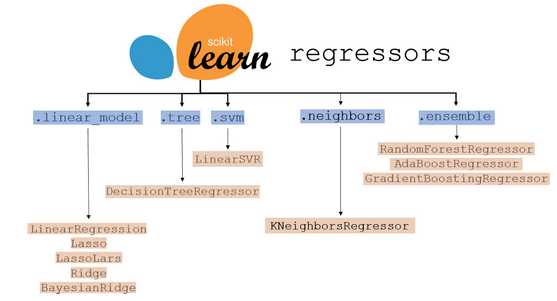

In [20]:
Image(filename='img/regressors.png')

By [Andre Ye](https://www.linkedin.com/in/andre-ye-501746150/), in KDnuggets:[The Ultimate Scikit-Learn Machine Learning Cheatsheet](https://www.kdnuggets.com/2021/01/ultimate-scikit-learn-machine-learning-cheatsheet.html).

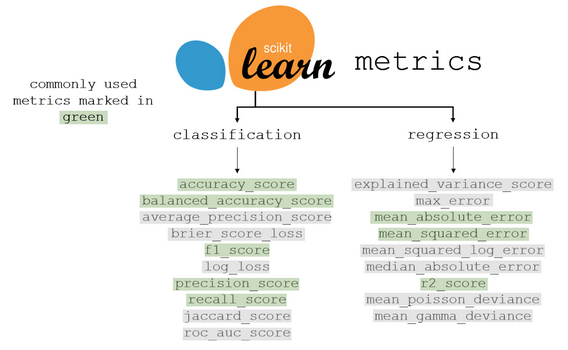

In [21]:
Image(filename='img/metrics.png')

In [22]:
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

*Confusion Matrix (sklearn):*
\begin{pmatrix} 
TN & FP\\
FN & TP
\end{pmatrix} 

\begin{equation}
Accuracy = \frac{TP+TN}{(TP+TN+FP+FN)} \\
Precision = \frac{TP}{(TP+FP)} \\
MCC = \frac{TP*TN-FP*FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}} \\
\end{equation}

*where:*

*TP = True Positive  
TN = True Negative  
FP = False Positive  
FN = False Negative* 

In [23]:
# Simple functions to run metrics and print results

def evaluationModels(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    # Best metric for binary (0/1) classification
    # evaluates TP, FP, TN, FN and the weight of each of them in the sample.
    mcc = matthews_corrcoef(y_test, y_pred)
    fp = confusion_matrix(y_test, y_pred)[0][1]
    return accuracy, precision, mcc, fp


def printMetrics(model, accuracy, precision, mcc, fp):
    modelName = model.__class__.__name__
    bar = "-" * 25
    print(f"{bar}\n {modelName}\n{bar}")
    print(f'- Accuracy: {accuracy:0.3f}')
    print(f'- Precision: {precision:0.3f}')
    print(f'- MCC: {mcc:0.3f}')
    print(f'- False Positives: {fp}')

### Trick (worst possible threshold)

All values equal to zero (0).

In [24]:
# Bad practice (don't do it)
import warnings
warnings.filterwarnings('ignore')

In [25]:
threshold = [0] * len(X_test)  # All results equal to 0

accuracy, precision, mcc, fp = metricsThreshold = evaluationModels(y_test, threshold)
printMetrics(threshold, accuracy, precision, mcc, fp)  # The name is not defined

-------------------------
 list
-------------------------
- Accuracy: 0.908
- Precision: 0.000
- MCC: 0.000
- False Positives: 0


### 4.1 Decision Tree

See the parameters in: [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

More details in: [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

How to tune the parameters: [InDepth: Parameter tuning for Decision Tree](https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3)

In [26]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=3, random_state=42)

# Training 
DT.fit(X_train, y_train)

# Training parameters
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [27]:
# Predict
y_pred_DT = DT.predict(X_test)

y_pred_DT

array([0, 1, 0, ..., 0, 0, 0])

In [28]:
# Evaluation
accuracy, precision, mcc, fp = metricsDT = evaluationModels(y_test, y_pred_DT)
printMetrics(DT, accuracy, precision, mcc, fp)

-------------------------
 DecisionTreeClassifier
-------------------------
- Accuracy: 0.978
- Precision: 0.893
- MCC: 0.868
- False Positives: 85


MCC varies beetwen -1 (perfect negative correlation) and 1 (perfect positive correlation).
OBS: 0 (random flip)

In [29]:
confusion_matrix(y_test, y_pred_DT) # (TN FP \\ FN & TP)

array([[8045,   85],
       [ 109,  710]])

In [30]:
# Feature Importance

featureImportanceDT = pd.DataFrame({'Feature': list(X_train.columns),
                                  'Importance': DT.feature_importances_}).\
    sort_values('Importance', ascending=False)

featureImportanceDT

,Feature,Importance
2,Excess kurtosis of the integrated profile,0.972950
5,Standard deviation of the DM-SNR curve,0.019431
0,Mean of the integrated profile,0.006398
1,Standard deviation of the integrated profile,0.001221
3,Skewness of the integrated profile,0.000000
4,Mean of the DM-SNR curve,0.000000
6,Excess kurtosis of the DM-SNR curve,0.000000
7,Skewness of the DM-SNR curve,0.000000


### 4.2 Random Forest

See the parameters in: [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

More details in: [Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)

How to tune the parameters: [Random Forest: Hyperparameters and how to fine-tune them](https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d)

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Building (need to tune for better results)
RF = RandomForestClassifier(max_depth=20, random_state=42)

# Training 
RF.fit(X_train, y_train)

# Training parameters
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [32]:
# Predict
y_pred_RF = RF.predict(X_test)

# Evaluating
accuracy, precision, mcc, fp = metricsRF = evaluationModels(y_test, y_pred_RF)
printMetrics(RF, accuracy, precision, mcc, fp)

-------------------------
 RandomForestClassifier
-------------------------
- Accuracy: 0.979
- Precision: 0.911
- MCC: 0.869
- False Positives: 68


In [33]:
# Feature Importance
featureImportanceRF = pd.DataFrame({'feature': list(X_train.columns),
                                  'importance': RF.feature_importances_}).\
    sort_values('importance', ascending=False)

featureImportanceRF

,feature,importance
2,Excess kurtosis of the integrated profile,0.374005
3,Skewness of the integrated profile,0.204549
0,Mean of the integrated profile,0.154595
4,Mean of the DM-SNR curve,0.068034
5,Standard deviation of the DM-SNR curve,0.064578
1,Standard deviation of the integrated profile,0.047228
7,Skewness of the DM-SNR curve,0.045558
6,Excess kurtosis of the DM-SNR curve,0.041453


### 4.3 K Nearest Neighbors (KNN)

See the parameters in: [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

More details in: [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Building
KNN = KNeighborsClassifier(metric='euclidean')

# Training 
KNN.fit(X_train, y_train)
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [35]:
# Predict
y_pred_KNN = KNN.predict(X_test)

# Evaluating
accuracy, precision, mcc, fp = metricsKNN = evaluationModels(y_test, y_pred_KNN)
printMetrics(KNN, accuracy, precision, mcc, fp)

-------------------------
 KNeighborsClassifier
-------------------------
- Accuracy: 0.972
- Precision: 0.892
- MCC: 0.827
- False Positives: 79


### 4.4 XGBoost (Ensemble model)

See the parameters in: [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)

More details in: [Getting Started with XGBoost in scikit-learn](https://towardsdatascience.com/getting-started-with-xgboost-in-scikit-learn-f69f5f470a97)

* XGBoost is regularized (avoid overfit).
* XGBoost Have hyperparameters to handle imbalanced data and null values.
* Combine some of the best practices and algorithms in a single model.
* Fast and easy to use.
* It is my go-to algorithm for dealing with structured data.

In [36]:
import xgboost as xgb

# Building (need to tune for better results)
XGB = xgb.XGBClassifier(max_depth=4, random_state=42)

# Training 
XGB.fit(X_train, y_train)

# Training parameters
XGB.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 4,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [37]:
# Predict
y_pred_XGB = XGB.predict(X_test)

# Evaluating
accuracy, precision, mcc, fp = metricsXGB = evaluationModels(y_test, y_pred_XGB)
printMetrics(XGB, accuracy, precision, mcc, fp)

-------------------------
 XGBClassifier
-------------------------
- Accuracy: 0.979
- Precision: 0.912
- MCC: 0.868
- False Positives: 67


In [38]:
# Feature Importance
featureImportanceXGB = pd.DataFrame({'feature': list(X_train.columns),
                                  'importance': XGB.feature_importances_}).\
    sort_values('importance', ascending=False)

featureImportanceXGB

,feature,importance
2,Excess kurtosis of the integrated profile,0.705079
5,Standard deviation of the DM-SNR curve,0.066338
1,Standard deviation of the integrated profile,0.043162
6,Excess kurtosis of the DM-SNR curve,0.040389
0,Mean of the integrated profile,0.038011
3,Skewness of the integrated profile,0.037221
4,Mean of the DM-SNR curve,0.035053
7,Skewness of the DM-SNR curve,0.034746


### 4.5 Neural Network: Multi-Layer Perceptron (MLP) - Most simple NN model

See the parameters in: [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

More details in: [Multi-layer Perceptron (MLP)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

In [39]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(alpha=1, max_iter=1000)

# Training 
MLP.fit(X_train, y_train)

# Training parameters
MLP.get_params()

{'activation': 'relu',
 'alpha': 1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [40]:
# Predict
y_pred_MLP = MLP.predict(X_test)

# Evaluating
accuracy, precision, mcc, fp = metricsMLP = evaluationModels(y_test, y_pred_MLP)
printMetrics(MLP, accuracy, precision, mcc, fp)

-------------------------
 MLPClassifier
-------------------------
- Accuracy: 0.977
- Precision: 0.921
- MCC: 0.857
- False Positives: 58


## 5. Comparison of models

In [41]:
results_accuracy = {
    'Threshold': metricsThreshold[0],
    'DT': metricsDT[0],
    'RF': metricsRF[0],
    'KNN': metricsKNN[0],
    'MLP': metricsMLP[0],
    'XGB': metricsXGB[0],
    
}
results_precision = {
    'Threshold': metricsThreshold[1],
    'DT': metricsDT[1],
    'RF': metricsRF[1],
    'KNN': metricsKNN[1],
    'MLP': metricsMLP[1],
    'XGB': metricsXGB[1],
}
results_mcc = {
    'Threshold': metricsThreshold[2],
    'DT': metricsDT[2],
    'RF': metricsRF[2],
    'KNN': metricsKNN[2],
    'MLP': metricsMLP[2],
    'XGB': metricsXGB[2],
}

results_fp = {
    'Threshold': metricsThreshold[3],
    'DT': metricsDT[3],
    'RF': metricsRF[3],
    'KNN': metricsKNN[3],
    'MLP': metricsMLP[3],
    'XGB': metricsXGB[3],
}

acc_df = pd.DataFrame.from_dict(results_accuracy, orient='index', columns=['Accuracy'])
precision_df = pd.DataFrame.from_dict(results_precision, orient='index', columns=['Precision'])
mcc_df = pd.DataFrame.from_dict(results_mcc, orient='index', columns=['MCC'])
fp_df = pd.DataFrame.from_dict(results_fp, orient='index', columns=['FP'])
results = pd.concat([acc_df, precision_df, mcc_df, fp_df], axis=1)
results

,Accuracy,Precision,MCC,FP
Threshold,0.908481,0.000000,0.000000,0
DT,0.978322,0.893082,0.868007,85
RF,0.978769,0.911111,0.869027,68
KNN,0.972399,0.891781,0.827126,79
MLP,0.977092,0.920548,0.856859,58
XGB,0.978657,0.912073,0.868180,67


**Q3 checkpoint**

## 6. Improving the model

What can we do better? 

- Be careful in this improvement phase that we often make the model worse.

In [42]:
from sklearn.model_selection import GridSearchCV
# Try possible combinations of the parameters and find the best ones.

from sklearn.model_selection import RandomizedSearchCV
# Random search for the best parameters (slow and computationally intensive).

from sklearn.ensemble import StackingClassifier
# Combine algorithms and make a hybrid model.

More details in [Machine Learning: GridSearchCV & RandomizedSearchCV](https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10) and [Stacking made easy with Sklearn](https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b).

## 7. Save Model

In [43]:
import pickle
import datetime

TODAY: str = datetime.date.today().strftime("%Y-%m-%d")
    
# save models
filename_DT = f'models/{TODAY}_Pulsar_DT.mlmodel'
pickle.dump(DT, open(filename_DT, 'wb'))

filename_RF = f'models/{TODAY}_Pulsar_RF.mlmodel'
pickle.dump(RF, open(filename_RF, 'wb'))

filename_KNN = f'models/{TODAY}_Pulsar_KNN.mlmodel'
pickle.dump(KNN, open(filename_KNN, 'wb'))

filename_MLP = f'models/{TODAY}_Pulsar_MLP.mlmodel'
pickle.dump(MLP, open(filename_MLP, 'wb'))

filename_XGB = f'models/{TODAY}_Pulsar_XGB.mlmodel'
pickle.dump(XGB, open(filename_XGB, 'wb'))

## 7.1 Load model

In [44]:
loaded_model = pickle.load(open(filename_XGB, 'rb'))

method = loaded_model.__class__.__name__
# In real life you will use data from the production pipeline.

result = loaded_model.score(X_test, y_test)

print(f'{method}: {result:0.3f}')

XGBClassifier: 0.979


## 8. How to identify overfitting?

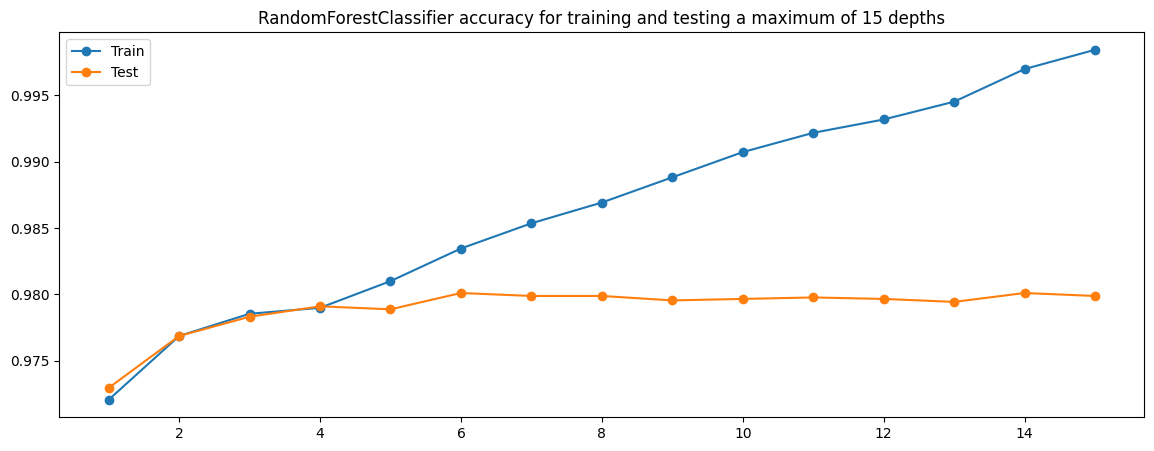

In [45]:
maxDepths = 15

depths = [i for i in range(1, maxDepths+1)]  # +1 to include run 20
train_results, test_results = list(), list()

for i in depths:
    MODEL = RandomForestClassifier(max_depth=i, random_state=42)
    MODEL.fit(X_train, y_train)
    method = MODEL.__class__.__name__
    # train
    y_pred_train = MODEL.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_results.append(train_accuracy)
    # test
    y_pred_test = MODEL.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_results.append(test_accuracy)
    
# Results train vs test
plt.figure(figsize=(14, 5))
plt.plot(depths, train_results, '-o', label='Train')
plt.plot(depths, test_results, '-o', label='Test')
plt.legend(loc="best")
plt.title(f"{method} accuracy for training and testing a maximum of {maxDepths} depths")
plt.show()


## 9. Automating boring tasks (Choosing the best model)

In [46]:
# importing more models

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [47]:
results_cols = ["Classifier", "Accuracy", "Precision", "MCC", "False Positives"]
results = pd.DataFrame(columns = results_cols)

# Models
classifiers = [
    DecisionTreeClassifier(max_depth=3, random_state=42),
    RandomForestClassifier(max_depth=4, random_state=42),
    KNeighborsClassifier(metric='euclidean'),
    xgb.XGBClassifier(max_depth=4, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(max_depth=4, random_state=42),
]

In [48]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    method = clf.__class__.__name__
    y_pred = clf.predict(X_test)
    accuracy, precision, mcc, fp = evaluationModels(y_test, y_pred)
    printMetrics(clf, accuracy, precision, mcc, fp)
    
    temp = pd.DataFrame([[method, accuracy * 100, precision * 100, mcc * 100, fp]], columns = results_cols)
    results = results.append(temp)

-------------------------
 DecisionTreeClassifier
-------------------------
- Accuracy: 0.978
- Precision: 0.893
- MCC: 0.868
- False Positives: 85
-------------------------
 RandomForestClassifier
-------------------------
- Accuracy: 0.979
- Precision: 0.929
- MCC: 0.870
- False Positives: 52
-------------------------
 KNeighborsClassifier
-------------------------
- Accuracy: 0.972
- Precision: 0.892
- MCC: 0.827
- False Positives: 79
-------------------------
 XGBClassifier
-------------------------
- Accuracy: 0.979
- Precision: 0.912
- MCC: 0.868
- False Positives: 67
-------------------------
 MLPClassifier
-------------------------
- Accuracy: 0.973
- Precision: 0.849
- MCC: 0.839
- False Positives: 125
-------------------------
 AdaBoostClassifier
-------------------------
- Accuracy: 0.978
- Precision: 0.928
- MCC: 0.863
- False Positives: 52
-------------------------
 GradientBoostingClassifier
-------------------------
- Accuracy: 0.977
- Precision: 0.890
- MCC: 0.860
- Fal

In [49]:
results.sort_values('MCC', ascending=False)

,Classifier,Accuracy,Precision,MCC,False Positives
0,RandomForestClassifier,97.910381,92.934783,86.982279,52
0,XGBClassifier,97.865683,91.207349,86.818047,67
0,DecisionTreeClassifier,97.832160,89.308176,86.800703,85
0,AdaBoostClassifier,97.809811,92.847318,86.311296,52
0,GradientBoostingClassifier,97.709241,88.959391,86.004777,87
0,MLPClassifier,97.306962,84.903382,83.885917,125
0,KNeighborsClassifier,97.239915,89.178082,82.712574,79
